## Segunda aula - 19/10/2017

### Conceitos básicos de redes complexas

In [1]:
# Importa os pacotes necessários.
import networkx as nx
import matplotlib.pylab as plt
import numpy as np

# Ignora mensagens de warnings na hora de desenhar o grafo.
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

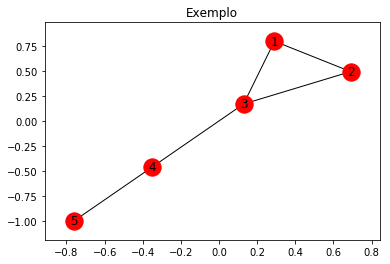

In [7]:
# Cria o objeto para o grafo exemplo.
g = nx.Graph()

# Adiciona as arestas.
g.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Desenha o grafo exemplo.
nx.draw_networkx(g)
plt.title("Exemplo");

### Exercícios:

1) Fornecer uma lista de adjacência ou uma matriz de adjacência e converter uma forma à outra.

2) Dada uma matriz de adjacência Madj, calcule, sem usar bibliotecas específicas, os seguintes índices básicos:


 - a) Ordem N e tamanho L;
 
 
 - b) Os graus ki's dos vértices i's (i = 1, 2, 3, ..., N) e a respectiva média km;
 
 
 - c) Os coeficientes de aglomeração ci's e a respectiva média cm;
 
 
 - d) Os mínimos caminhos médios li's e a respectiva média lm;
 
 
 - e) E o diâmetro Diam do grafo.

In [3]:
# Lista de adjacência do exemplo.
Ladj = np.array([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5)])

# Matriz de adjacência do exemplo.
Madj = np.array([[0, 1, 1, 0, 0],
                 [1, 0, 1, 0, 0],
                 [1, 1, 0, 1, 0],
                 [0, 0, 1, 0, 1],
                 [0, 0, 0, 1, 0]])

### Respostas

#### Exercício 1:

In [4]:
def Ladj2Madj(Ladj):
    
    # Conta quantos nós há na rede.
    N = np.size(np.unique(Ladj))
    
    # Inicializa a matriz.
    Madj = np.zeros((N, N))
    
    # Preenche a matriz.
    for aresta in Ladj:
        i = aresta[0] - 1
        j = aresta[1] - 1
        Madj[i][j] = Madj[j][i] = 1
    
    return Madj
    
    
def Madj2Ladj(Madj):
    
    # Conta quantos nós há na rede.
    N = Madj.shape[0]
    
    # Inicializa a lista.
    Ladj = []
    
    # Itera acima da diagonal da matriz.
    for i in range(N):
        for j in range(i + 1, N):
            if Madj[i, j] != 0:
                 aresta = (i + 1, j + 1)
                 Ladj.append(aresta)   
            
    return np.array(Ladj) 

#### Exercício 2:

In [226]:
def ordem(Madj):
    return Madj.shape[0]
    
    
def tamanho(Madj):
    return np.sum(Madj)/2


def graus(Madj):
    
    # Inicializa o vetor com os graus dos vértices. 
    kis = np.array([])
    
    # Loop na diagonal da matriz.
    for i in range(ordem(Madj)):
        
        # Soma dos elementos das linhas.
        soma = np.sum(Madj[i, :])
        kis = np.append(kis, soma) 
    
    return kis 


def grau_medio(Madj):
    return np.mean(graus(Madj))


def coeficientes_de_aglomeracao(Madj, verbose=False):
    
    # Inicializa o vetor com os coeficientes de aglomeração dos vértices. 
    Cis = np.array([])
    
    # Vetor com os graus dos vértices.
    kis = graus(Madj)
    
    # Imprime os coeficientes calculados para cada vértice no modo verboso.
    if verbose == True:
        print("\nModo verboso:\n")
    
    # Loop em cada vértice.
    for i in range(ordem(Madj)):
        
        # Acha as posições dos vizinhos do i-ésimo vértice.
        vizinhosi = np.where(Madj[i, :] == 1)[0]
        
        # Grau do i-ésimo vértice.
        ki = kis[i]
        
        # Inicializa número de arestas entre os vizinhos do i-ésimo vértice.
        Ei = 0
        
        # Testa se os vizinhos estão ligados entre si.
        for j in range(0, len(vizinhosi)):
            for k in range(j + 1, len(vizinhosi)):
                if Madj[vizinhosi[j], vizinhosi[k]] == 1:
                    Ei = Ei + 1
        
        # Calcula o coeficiente de aglomeração do i-ésimo vértice..
        if ki == 1: 
            Ci = 0 # Evita divisão por zero.
        
        else:
            Ci = 2*Ei/ki/(ki-1)
            
        Cis = np.append(Cis, Ci)
        
        if verbose == True:
            print("Vértice i=%u:  ki=%u  Ei=%u  Ci=%.2f  vizinhos=%s" %(i+1, ki, Ei, Ci, vizinhosi+1))
    
    return Cis    


def coeficientes_de_aglomeracao_medio(Madj):
    return np.mean(coeficientes_de_aglomeracao(Madj))

# Função para imprimir informações.
def imprime(Madj): 
    coeficientes_de_aglomeracao(Madj, verbose=True)

In [140]:
Cis

array([ 1.,  1.,  1.,  1.,  0.])

In [66]:
lista1

array([[ 4.,  2.],
       [ 3.,  2.],
       [ 5.,  6.]])

### Testes

#### Exercício 1:

In [5]:
# Testa se é possível recuperar Madj a partir de Ladj.
print(Ladj2Madj(Ladj) == Madj)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [6]:
# Testa se é possível recuperar Ladj a partir de Madj.
print(Madj2Ladj(Madj) == Ladj)

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]


#### Exercício 2:

### Testes adicionais com outro grafo

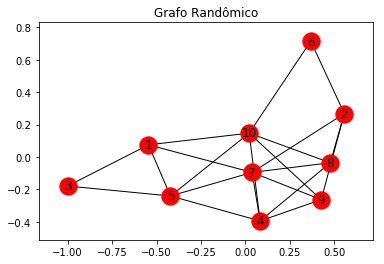

In [218]:
# Matriz de adjacência de um gráfico randômico. 
Madj_er = nx.adjacency_matrix(nx.erdos_renyi_graph(10, 0.5)).todense()

# Cria o objeto grafo correspondente a matriz acima.
g_er = nx.Graph()
nx.from_numpy_matrix(Madj_er, create_using=g_er)

# Renomeando os nós.
velhos = np.array(g_er.nodes())      # Começa em 0.
novos = np.array(g_er.nodes()) + 1  # Começa em 1.
renomeia = dict(zip(velhos, novos))
nx.relabel_nodes(g_er, renomeia, copy=False)

# Desenha o grafo.
nx.draw_networkx(g_er)
plt.title("Grafo Randômico");

In [222]:
imprime(np.array(Madj_er))


Modo verboso

Vértice i=1:  ki=4  Ei=3  Ci=0.50  vizinhos=[ 3  5  7 10]
Vértice i=2:  ki=4  Ei=2  Ci=0.33  vizinhos=[6 7 8 9]
Vértice i=3:  ki=2  Ei=1  Ci=1.00  vizinhos=[1 5]
Vértice i=4:  ki=5  Ei=6  Ci=0.60  vizinhos=[ 5  7  8  9 10]
Vértice i=5:  ki=5  Ei=5  Ci=0.50  vizinhos=[ 1  3  4  7 10]
Vértice i=6:  ki=2  Ei=0  Ci=0.00  vizinhos=[ 2 10]
Vértice i=7:  ki=6  Ei=6  Ci=0.40  vizinhos=[1 2 4 5 8 9]
Vértice i=8:  ki=4  Ei=3  Ci=0.50  vizinhos=[ 2  4  7 10]
Vértice i=9:  ki=4  Ei=3  Ci=0.50  vizinhos=[ 2  4  7 10]
Vértice i=10:  ki=6  Ei=4  Ci=0.27  vizinhos=[1 4 5 6 8 9]


#### Exercício 1:

In [14]:
# Testa se a lista de adjacência gerada pelo pacote networkx é igual  
# à lista gerada pela minha função.

print("\nListas de adjacência:\n")
print("---- a) gerada pelo pacote networkx: ---- \n")
for line in nx.adjlist.generate_adjlist(g_er):
    print(line)
    
print("\n---- b) gerada pela minha funcao = ---- \n")    
for i in (Madj2Ladj(Madj_er)):
    print(i-1, end='')


Listas de adjacência:

---- a) gerada pelo pacote networkx: ---- 

0 1 5 8 9
1 8
2 4 5 6
3 4 7
4 5 8 9
5 6 7 8
6 7 8 9
7 8 9
8 9
9

---- b) gerada pela minha funcao = ---- 

[0 1][0 5][0 8][0 9][1 8][2 4][2 5][2 6][3 4][3 7][4 5][4 8][4 9][5 6][5 7][5 8][6 7][6 8][6 9][7 8][7 9][8 9]

#### Exercício 2:

In [188]:
Cis = coeficientes_de_aglomeracao(np.array(Madj_er.todense()), verbose=True)


Modo verboso

Vértice i=1:  ki=4  Ei=3  Ci=0.50  vizinhos=[ 2  6  9 10]
Vértice i=2:  ki=2  Ei=1  Ci=1.00  vizinhos=[1 9]
Vértice i=3:  ki=3  Ei=2  Ci=0.67  vizinhos=[5 6 7]
Vértice i=4:  ki=2  Ei=0  Ci=0.00  vizinhos=[5 8]
Vértice i=5:  ki=5  Ei=3  Ci=0.30  vizinhos=[ 3  4  6  9 10]
Vértice i=6:  ki=6  Ei=7  Ci=0.47  vizinhos=[1 3 5 7 8 9]
Vértice i=7:  ki=5  Ei=6  Ci=0.60  vizinhos=[ 3  6  8  9 10]
Vértice i=8:  ki=5  Ei=5  Ci=0.50  vizinhos=[ 4  6  7  9 10]
Vértice i=9:  ki=7  Ei=10  Ci=0.48  vizinhos=[ 1  2  5  6  7  8 10]
Vértice i=10:  ki=5  Ei=5  Ci=0.50  vizinhos=[1 5 7 8 9]


In [189]:
Madj_er.todense()

matrix([[0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 1, 0, 0, 1, 1],
        [1, 0, 1, 0, 1, 0, 1, 1, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 1, 0, 1, 1, 0, 1, 1],
        [1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 1, 1, 1, 0]], dtype=int64)

In [186]:
Madj

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0]])